#📌 Extracción

Carga de datos:
Primero, se cargan los datos desde el archivo JSON y se convierten en un DataFrame de pandas de fácil manipulación

Dado que el JSON tiene una estructura anidada, el primer paso es cargarlo y, de inmediato, expandir las columnas que contienen diccionarios (customer, phone, internet, account) en columnas individuales. Usaremos la potente función json_normalize de Pandas para esto.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# --- Carga y Desanidación del archivo JSON proporcionado ---
try:
    # 1. Abrimos y cargamos el archivo JSON en un objeto de Python
    with open('TelecomX_Data.json', 'r') as f:
        data = json.load(f)

    # 2. Usamos json_normalize para aplanar la estructura anidada
    # El separador '_' unirá los nombres de las claves anidadas (ej. customer_gender)
    df = pd.json_normalize(data, sep='_')

    print("✅ Datos cargados y desanidados exitosamente.")
    print("Dimensiones del DataFrame:", df.shape)

except FileNotFoundError:
    print("❌ Error: El archivo 'TelecomX_Data.json' no se encontró.")
    df = pd.DataFrame()

# Visualizamos las primeras filas del DataFrame ya aplanado para confirmar
if not df.empty:
    display(df.head())

✅ Datos cargados y desanidados exitosamente.
Dimensiones del DataFrame: (7267, 21)


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Ahora que los datos están en un formato tabular, exploramos su estructura para entender las variables disponibles.

In [34]:
if not df.empty:
    # --- Exploración inicial del DataFrame aplanado ---
    print("--- Información General del DataFrame ---")
    df.info()

--- Información General del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  intern

Ahora realizamos comprobación de Incoherencias, buscando valores ausentes, duplicados y errores de formato.

In [15]:
if not df.empty:
    # --- Comprobación de valores ausentes ---
    print("--- Valores Ausentes por Columna ---")
    print(df.isnull().sum()[df.isnull().sum() > 0])

    # --- Comprobación de filas duplicadas ---
    print("\n--- Cantidad de Filas Duplicadas ---")
    print("Número de duplicados:", df.duplicated().sum())

--- Valores Ausentes por Columna ---
Series([], dtype: int64)

--- Cantidad de Filas Duplicadas ---
Número de duplicados: 0


#🔧 Transformación

Con el código anterior, evidenciamos, que no hay valores nulos ni duplicados.
El único problema aparente sigue siendo el tipo de dato de account_Charges_Total. Por lo que procedemos a corregir el formato de account_Charges_Total

In [35]:
if not df.empty:
    # --- Manejo de la columna 'account_Charges_Total' ---
    df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')

    # Llenamos los valores nulos resultantes (para clientes con tenure=0) con 0
    df['account_Charges_Total'].fillna(0, inplace=True)

    print("✅ Inconsistencias en 'account_Charges_Total' manejadas.")
    print(f"Valores nulos restantes: {df['account_Charges_Total'].isnull().sum()}")

✅ Inconsistencias en 'account_Charges_Total' manejadas.
Valores nulos restantes: 0


/tmp/ipython-input-1493561355.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account_Charges_Total'].fillna(0, inplace=True)


Se cre la columna de cuentas diarias(Cuentas_Diarias) para una visión más detallada del gasto.

In [36]:
if not df.empty:
    # --- Creación de la columna 'Cuentas_Diarias' ---
    df['Cuentas_Diarias'] = df['account_Charges_Monthly'] / 30

    print("✅ Columna 'Cuentas_Diarias' creada.")
    display(df[['account_Charges_Monthly', 'Cuentas_Diarias']].head())

✅ Columna 'Cuentas_Diarias' creada.


,account_Charges_Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


Para una estandarización y Transformación Final, renombramos las columnas a un formato más limpio y en español, y transformamos variables de texto a numéricas para el análisis.

In [37]:
if not df.empty:
    # --- Renombrar columnas para mayor claridad ---
    nuevos_nombres = {
        'customerID': 'ID_Cliente',
        'Churn': 'Evasion',
        'customer_gender': 'Genero',
        'customer_SeniorCitizen': 'Adulto_Mayor',
        'customer_Partner': 'Tiene_Pareja',
        'customer_Dependents': 'Tiene_Dependientes',
        'customer_tenure': 'Meses_Contrato',
        'phone_PhoneService': 'Servicio_Telefonico',
        'phone_MultipleLines': 'Multiples_Lineas',
        'internet_InternetService': 'Servicio_Internet',
        'internet_OnlineSecurity': 'Seguridad_Online',
        'internet_OnlineBackup': 'Respaldo_Online',
        'internet_DeviceProtection': 'Proteccion_Dispositivo',
        'internet_TechSupport': 'Soporte_Tecnico',
        'internet_StreamingTV': 'Streaming_TV',
        'internet_StreamingMovies': 'Streaming_Peliculas',
        'account_Contract': 'Contrato',
        'account_PaperlessBilling': 'Facturacion_Digital',
        'account_PaymentMethod': 'Metodo_Pago',
        'account_Charges_Monthly': 'Cargo_Mensual',
        'account_Charges_Total': 'Cargo_Total'
    }
    df.rename(columns=nuevos_nombres, inplace=True)

    # --- Transformar valores binarios de 'Yes'/'No' a 1/0 ---
    columnas_a_transformar = [
        'Evasion', 'Tiene_Pareja', 'Tiene_Dependientes', 'Servicio_Telefonico',
        'Facturacion_Digital'
    ]
    for col in columnas_a_transformar:
        if col in df.columns:
            df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

    print("✅ Columnas renombradas y datos binarios transformados.")
    display(df.head(3))

✅ Columnas renombradas y datos binarios transformados.


,ID_Cliente,Evasion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Facturacion_Digital,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333


#📊 Carga y análisis

Análisis Descriptivo

Ya con los datos completamente limpios y estructurados, procedemos al análisis descriptivo, e iniciamos con las métricas estadísticas de las variables numéricas.

In [38]:
if not df.empty:
    print("--- Estadísticas Descriptivas ---")
    display(df.describe())

--- Estadísticas Descriptivas ---


,Evasion,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Facturacion_Digital,Cargo_Mensual,Cargo_Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2277.182035,2.157337
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


Distribución de Evasión

Visualizamos la proporción de clientes que han cancelado el servicio.

/tmp/ipython-input-3753197809.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Evasion', data=df, palette='viridis')


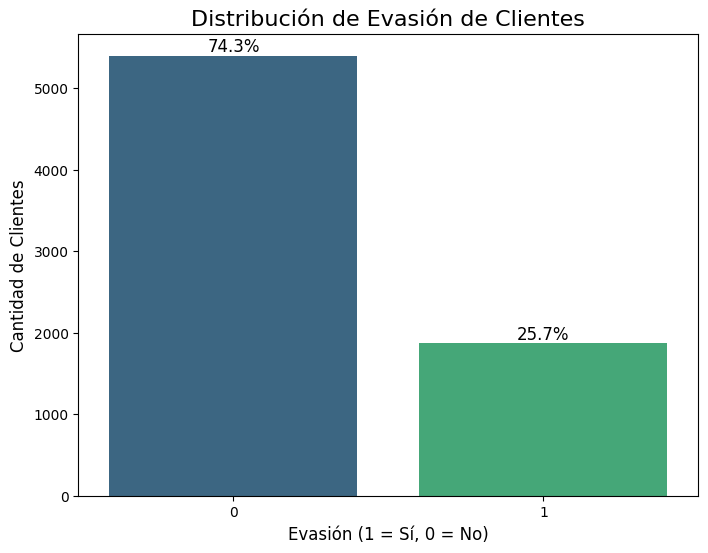

In [43]:
if not df.empty:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='Evasion', data=df, palette='viridis')
    plt.title('Distribución de Evasión de Clientes', fontsize=16)
    plt.xlabel('Evasión (1 = Sí, 0 = No)', fontsize=12)
    plt.ylabel('Cantidad de Clientes', fontsize=12)

    total = len(df['Evasion'])
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

    plt.show()

Evasión por Variables Categóricas

Analizamos la evasión en diferentes segmentos de clientes.

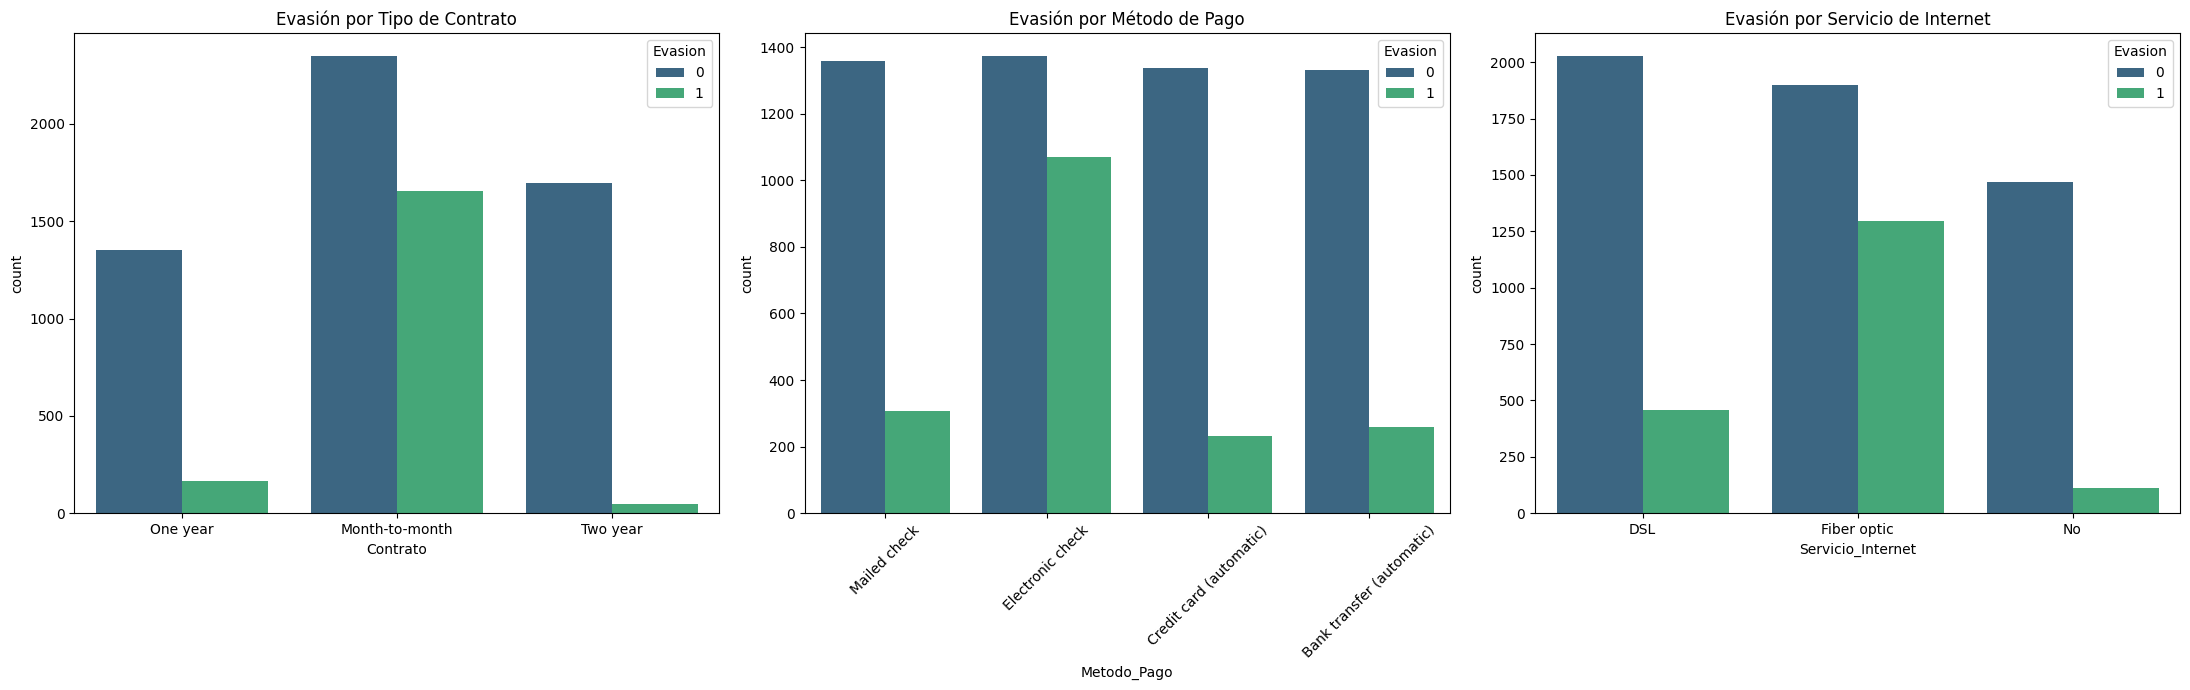

In [40]:
if not df.empty:
    fig, axes = plt.subplots(1, 3, figsize=(22, 7))

    sns.countplot(x='Contrato', hue='Evasion', data=df, ax=axes[0], palette='viridis').set_title('Evasión por Tipo de Contrato')
    sns.countplot(x='Metodo_Pago', hue='Evasion', data=df, ax=axes[1], palette='viridis').set_title('Evasión por Método de Pago')
    sns.countplot(x='Servicio_Internet', hue='Evasion', data=df, ax=axes[2], palette='viridis').set_title('Evasión por Servicio de Internet')

    axes[1].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

Evasión por Variables Númericas

Comparamos la distribución de variables numéricas entre clientes que se fueron y los que no.

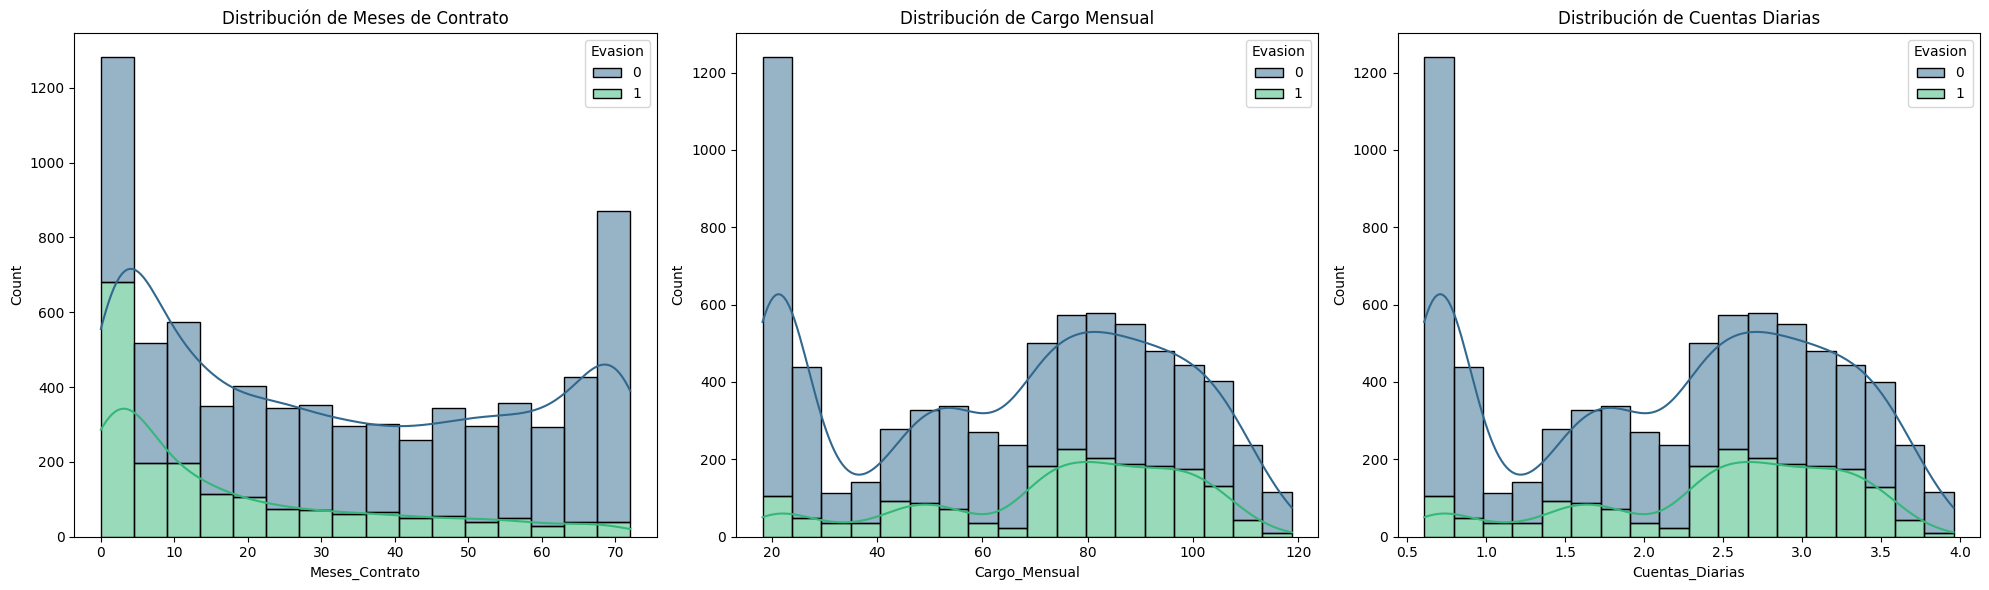

In [41]:
if not df.empty:
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    sns.histplot(data=df, x='Meses_Contrato', hue='Evasion', multiple='stack', ax=axes[0], palette='viridis', kde=True).set_title('Distribución de Meses de Contrato')
    sns.histplot(data=df, x='Cargo_Mensual', hue='Evasion', multiple='stack', ax=axes[1], palette='viridis', kde=True).set_title('Distribución de Cargo Mensual')
    sns.histplot(data=df, x='Cuentas_Diarias', hue='Evasion', multiple='stack', ax=axes[2], palette='viridis', kde=True).set_title('Distribución de Cuentas Diarias')

    plt.tight_layout()
    plt.show()

Análisis de correlación

Identificamos las relaciones lineales entre las variables y la evasión.

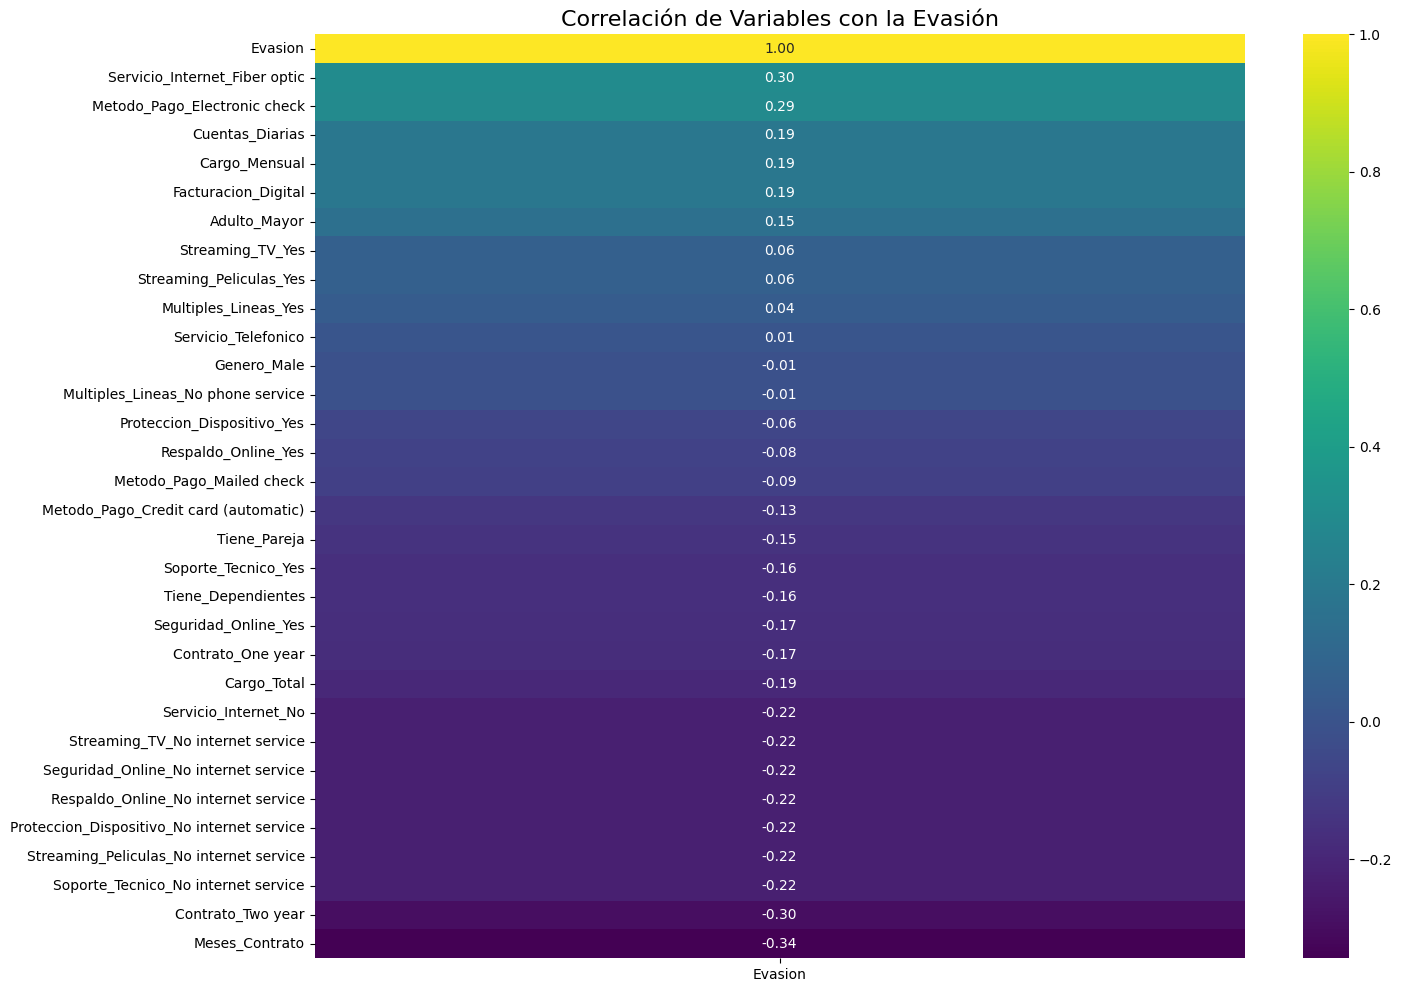

In [42]:
if not df.empty:
    # Seleccionamos solo las columnas numéricas para una matriz de correlación limpia
    df_numeric = df.select_dtypes(include=np.number)

    # Creamos columnas dummy para las categóricas restantes para un análisis completo
    df_categoric = df.select_dtypes(exclude=np.number).drop('ID_Cliente', axis=1)
    df_dummy = pd.get_dummies(df_categoric, drop_first=True)

    df_corr = pd.concat([df_numeric, df_dummy], axis=1)

    plt.figure(figsize=(15, 12))
    corr_evasion = df_corr.corr()[['Evasion']].sort_values(by='Evasion', ascending=False)

    sns.heatmap(corr_evasion, annot=True, cmap='viridis', fmt=".2f")
    plt.title('Correlación de Variables con la Evasión', fontsize=16)
    plt.show()